# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

## The Data

They have provided you with their bookings data in a file called `hotel_bookings.csv`, which contains the following:

| Column     | Description              |
|------------|--------------------------|
| `Booking_ID` | Unique identifier of the booking. |
| `no_of_adults` | The number of adults. |
| `no_of_children` | The number of children. |
| `no_of_weekend_nights` | Number of weekend nights (Saturday or Sunday). |
| `no_of_week_nights` | Number of week nights (Monday to Friday). |
| `type_of_meal_plan` | Type of meal plan included in the booking. |
| `required_car_parking_space` | Whether a car parking space is required. |
| `room_type_reserved` | The type of room reserved. |
| `lead_time` | Number of days before the arrival date the booking was made. |
| `arrival_year` | Year of arrival. |
| `arrival_month` | Month of arrival. |
| `arrival_date` | Date of the month for arrival. |
| `market_segment_type` | How the booking was made. |
| `repeated_guest` | Whether the guest has previously stayed at the hotel. |
| `no_of_previous_cancellations` | Number of previous cancellations. |
| `no_of_previous_bookings_not_canceled` | Number of previous bookings that were canceled. |
| `avg_price_per_room` | Average price per day of the booking. |
| `no_of_special_requests` | Count of special requests made as part of the booking. |
| `booking_status` | Whether the booking was cancelled or not. |

Source (data has been modified): https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


hotels = pd.read_csv("C:/Users/Ahmad/Desktop/Python/data-analysis-projects/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

### Note:

To ensure the best user experience, we currently discourage using Folium and Bokeh in Workspace notebooks.

## Judging Criteria

| CATEGORY | WEIGHTING | DETAILS                                                            |
|---------|----------|---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul>|
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul>|
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## Checklist before publishing


* Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
* Remove redundant cells like the judging criteria, so the workbook is focused on your work.
* Check that all the cells run without error.

## Time is ticking. Good luck! 

### Data Validation

The dataset .  .  .

In [55]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [56]:
hotels.shape

(36275, 19)

In [57]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [58]:
# converting the float datasets to int64
for col in hotels.columns:
    if col == 'avg_price_per_room':
        pass
    else:
        if hotels[col].dtype == 'float64':
            hotels[col] = pd.to_numeric(hotels[col], errors='coerce').fillna(0).astype('int64')

In [59]:
hotels.isna().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        526
required_car_parking_space                 0
room_type_reserved                      1171
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                     1512
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                       460
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [60]:
# we can replace the NAN meal plan with Non selected
hotels['type_of_meal_plan'] = hotels['type_of_meal_plan'].fillna('Not Selected')

hotels['type_of_meal_plan'].head()

0    Not Selected
1    Not Selected
2     Meal Plan 1
3     Meal Plan 1
4    Not Selected
Name: type_of_meal_plan, dtype: object

In [61]:
hotels = hotels.dropna(subset=['room_type_reserved', 'market_segment_type', 'avg_price_per_room'])
hotels.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [62]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33215 entries, 1 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            33215 non-null  object 
 1   no_of_adults                          33215 non-null  int64  
 2   no_of_children                        33215 non-null  int64  
 3   no_of_weekend_nights                  33215 non-null  int64  
 4   no_of_week_nights                     33215 non-null  int64  
 5   type_of_meal_plan                     33215 non-null  object 
 6   required_car_parking_space            33215 non-null  int64  
 7   room_type_reserved                    33215 non-null  object 
 8   lead_time                             33215 non-null  int64  
 9   arrival_year                          33215 non-null  int64  
 10  arrival_month                         33215 non-null  int64  
 11  arrival_date   

In [63]:
hotels.duplicated().sum()

0

In [64]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [65]:
for col in hotels.columns:
    print(f"{col}: {hotels[col].nunique()}")


Booking_ID: 33215
no_of_adults: 5
no_of_children: 6
no_of_weekend_nights: 7
no_of_week_nights: 18
type_of_meal_plan: 4
required_car_parking_space: 2
room_type_reserved: 7
lead_time: 351
arrival_year: 2
arrival_month: 12
arrival_date: 32
market_segment_type: 5
repeated_guest: 2
no_of_previous_cancellations: 9
no_of_previous_bookings_not_canceled: 59
avg_price_per_room: 3747
no_of_special_requests: 6
booking_status: 2


## Exploratory Data Analysis

#### Univariate analysis

In [66]:
hotels.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,33215.0,1.830288,0.542368,0.0,2.000,2.00,2.0,4.0
no_of_children,33215.0,0.104441,0.402643,0.0,0.000,0.00,0.0,10.0
no_of_weekend_nights,33215.0,0.803553,0.870856,0.0,0.000,1.00,2.0,6.0
no_of_week_nights,33215.0,2.157429,1.428741,0.0,1.000,2.00,3.0,17.0
required_car_parking_space,33215.0,0.028872,0.167451,0.0,0.000,0.00,0.0,1.0
lead_time,33215.0,84.178263,85.979067,0.0,15.000,56.00,125.0,443.0
arrival_year,33215.0,2017.819750,0.384401,2017.0,2018.000,2018.00,2018.0,2018.0
arrival_month,33215.0,7.429505,3.065387,1.0,5.000,8.00,10.0,12.0
arrival_date,33215.0,15.163812,8.976347,0.0,7.000,15.00,23.0,31.0
repeated_guest,33215.0,0.025802,0.158545,0.0,0.000,0.00,0.0,1.0


2018    27228
2017     5987
Name: arrival_year, dtype: int64


<AxesSubplot:>

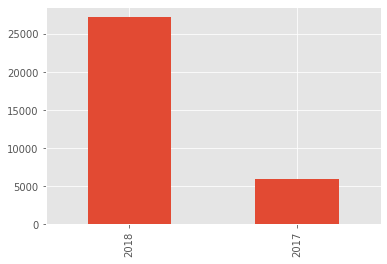

In [67]:
# Number of hotel visitors per year?
print(hotels.arrival_year.value_counts())
hotels.arrival_year.value_counts().plot(kind='bar')

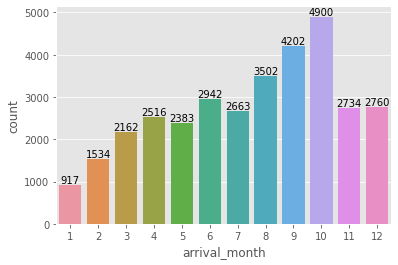

In [68]:
# to display the count of each bar
def count_label(ax):
    for i in ax.containers:
        ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])

ax = sns.countplot(data=hotels, x='arrival_month')
count_label(ax)

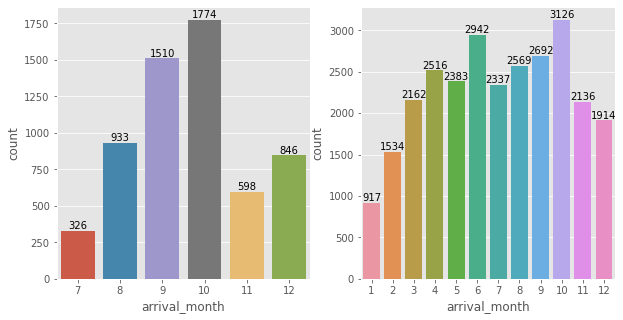

In [69]:
# is the arrival month different by year?
y2017 = hotels[hotels['arrival_year'] == 2017]
y2018 = hotels[hotels['arrival_year'] == 2018]

fig, axes = plt.subplots(1,2, figsize=(10,5))
ax17 = sns.countplot(data=y2017, x='arrival_month', ax=axes[0])
ax18 = sns.countplot(data=y2018, x='arrival_month', ax=axes[1])

# to display the count of each bar
count_label(ax17)
count_label(ax18)

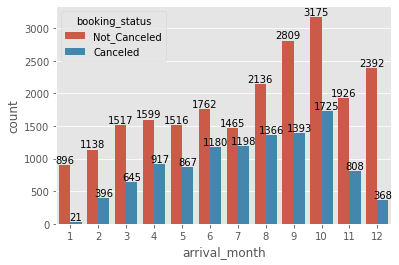

In [78]:
# Which months do people cancel the most?
ax1 = sns.countplot(data=hotels, x='arrival_month', hue='booking_status')
count_label(ax1)

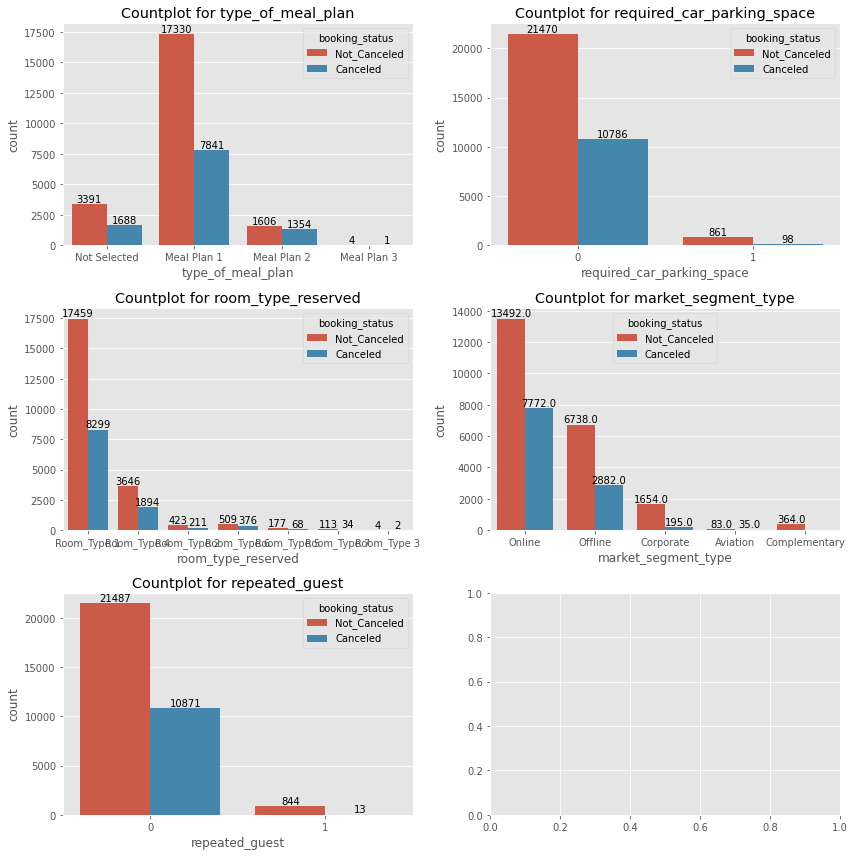

In [94]:
col = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
# cat_cols = hotels.loc[:, col]
# col_num = 1

for i, col in enumerate(col):
    row_idx = i // 2  # Calculate the row index
    col_idx = i % 2  # Calculate the column index

    # Create the countplot with hue
    ax = sns.countplot(x=col, hue='booking_status', data=hotels, ax=axes[row_idx, col_idx])

    # Set the title for the subplot
    axes[row_idx, col_idx].set_title(f'Countplot for {col}')

    count_label(ax)

fig.tight_layout()


<AxesSubplot:xlabel='avg_price_per_room'>

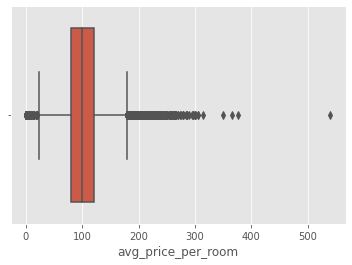

In [84]:
sns.boxplot(data=hotels, x='avg_price_per_room')

In [86]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')